In [8]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd

In [9]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


In [10]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face

In [11]:
tags = {'walls':[5,6], 'interface': [7], 'faces': [8,9,10,11]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 92), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fad3a7152b0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 92), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fad3a7152b0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 92), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fad3a715b30>))

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


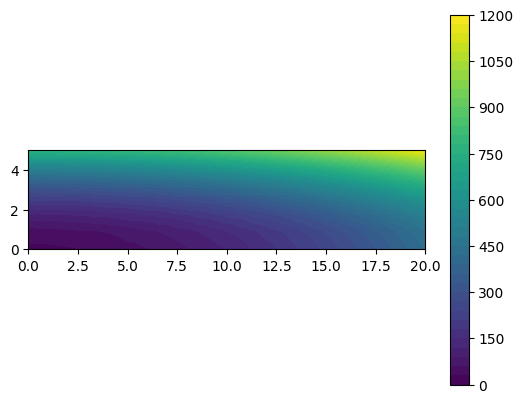

In [12]:
heat = gd.Heat(mesh_load,'Heat')
heat.solve()
heat.plot_solution()

In [14]:
data = gd.DataHeat(heat,mesh_load)
flux = data.flux(tags['interface'][0])
print(flux)

-402.5183552262896
